In [651]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ratings-electronic-csv/ratings_Electronics (1).csv


# Sentiment Analysis on Amazon Electronic Product Reviews

## Project Objective
Perform sentiment analysis on customer reviews to classify them as **Positive, Neutral, or Negative**, helping businesses understand customer opinions.

## Dataset
- Dataset: Amazon product reviews (Electronics)  
- Source: [Kaggle Dataset](https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews)  
- Sample size used: 10,000 reviews (for memory efficiency)

## Steps
1. **Load dataset** and inspect columns.
2. **Clean dataset**: Remove missing values and unnecessary columns.
3. **Label sentiment** based on rating:
   - 1–2 → Negative  
   - 3 → Neutral  
   - 4–5 → Positive
4. **Text preprocessing**: Tokenization, stopword removal, and vectorization (TF-IDF).
5. **Model training**: Logistic Regression and Random Forest Classifier.
6. **Evaluation**: Accuracy, Precision, Recall, F1 Score.
7. **Visualization**: Word Clouds for positive, neutral, and negative reviews.

## Key Results
- Random Forest Classifier performed better than Logistic Regression.
- Word clouds revealed common words in each sentiment category.

## Conclusion
The project demonstrates how machine learning models can classify customer reviews effectively, providing insights for business decision-making.


In [652]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [653]:
import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ratings-electronic-csv/ratings_Electronics (1).csv


In [654]:
df = pd.read_csv("/kaggle/input/ratings-electronic-csv/ratings_Electronics (1).csv", nrows=10000)  # Use your CSV path

In [655]:
print(df.columns)


Index(['AKM1MP6P0OYPR', '0132793040', '5.0', '1365811200'], dtype='object')


In [656]:
import pandas as pd

# Load CSV without headers
df = pd.read_csv("/kaggle/input/ratings-electronic-csv/ratings_Electronics (1).csv", header=None)

# Check first few rows
print(df.head())


                0           1    2           3
0   AKM1MP6P0OYPR  0132793040  5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200


In [657]:
import pandas as pd

# Sample 10,000 rows to avoid memory issues
df = df.sample(n=10000, random_state=42)

# Reset index
df.reset_index(drop=True, inplace=True)

# Check first few rows
print(df.head())


                0           1    2           3
0  A1Z3YJF1S8Z1M3  B000M9ISQ2  5.0  1199750400
1   ALDXDYEGKB27G  B002L6HE9G  4.0  1331337600
2  A15LOGO6NBSI6B  B007MXGG5Q  5.0  1358640000
3  A23LX12CA3G4FG  B008HOEDYU  1.0  1385337600
4  A3TV7QFYXAG130  B0069R7TAM  5.0  1402963200


In [658]:
print(df.shape)   # prints (rows, columns)
print(df.columns) # prints the current column names


(10000, 4)
Index([0, 1, 2, 3], dtype='int64')


In [659]:
# Assign proper column names (example for Amazon dataset)
df.columns = ['reviewerID', 'asin', 'rating', 'timestamp']

# Now you can create sentiment labels from ratings
def rating_to_sentiment(rating):
    rating = float(rating)
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)

# Check sentiment counts
print(df['sentiment'].value_counts())


sentiment
Positive    7420
Negative    1755
Neutral      825
Name: count, dtype: int64


In [660]:
# Step 4: Handle missing values
# Assuming the rating column is named 'overall'
df = df.dropna(subset=['rating'])  # Remove rows with missing ratings


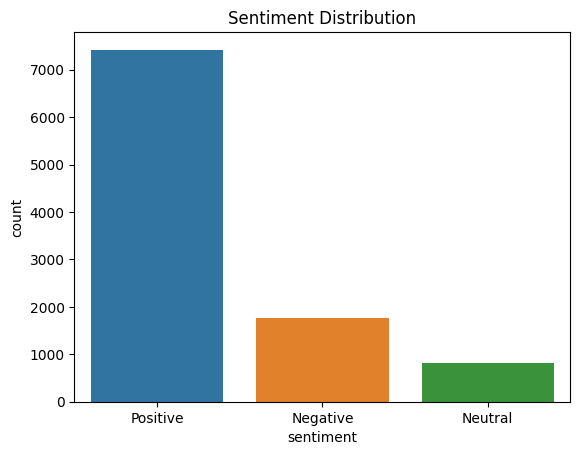

In [661]:
# Step 6: Check the distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [662]:
from sklearn.preprocessing import LabelEncoder


In [663]:
from sklearn.preprocessing import LabelEncoder

# Define X (features) and y (target)
X = df['asin']   # The review text
y = df['sentiment']    # The sentiment labels you created earlier

# Encode y labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original Sentiment Labels:", y.unique())
print("Encoded Labels:", list(y_encoded[:10]))


Original Sentiment Labels: ['Positive' 'Negative' 'Neutral']
Encoded Labels: [2, 2, 2, 0, 2, 1, 1, 1, 2, 2]


In [664]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [665]:
# Step 7: Prepare data for modeling
# Here we just use 'overall' as feature, since text is not available
X = df[['rating']]
y = df['sentiment']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [666]:
# Drop missing rows
df = df.dropna(subset=['asin', 'sentiment'])


In [667]:
# Take a smaller random sample for testing
df_sample = df.sample(n=5000, random_state=42)

# Drop missing values
df_sample = df_sample.dropna(subset=['asin', 'sentiment'])


In [668]:
# Step 8: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [669]:
# Step 10: Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [670]:
# Step 11: Predict on test data
y_pred = rf_model.predict(X_test)


In [671]:
# Step 12: Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Random Forest Evaluation ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00      1488

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [672]:
# Step 10: Predictions and evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
y_pred = rf_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       353
     Neutral       1.00      1.00      1.00       159
    Positive       1.00      1.00      1.00      1488

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



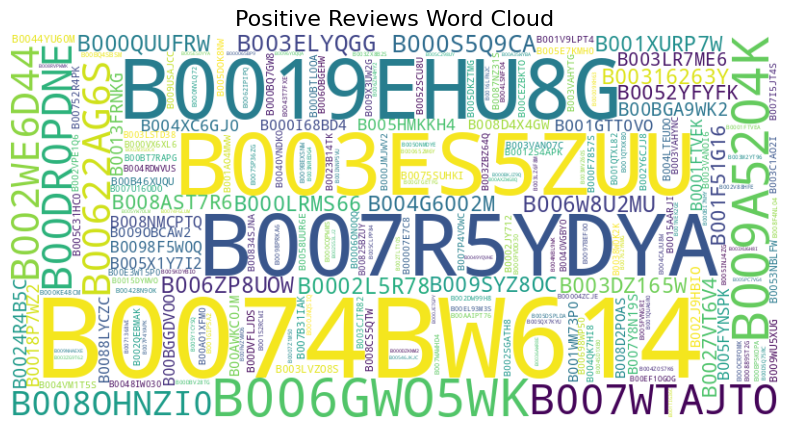

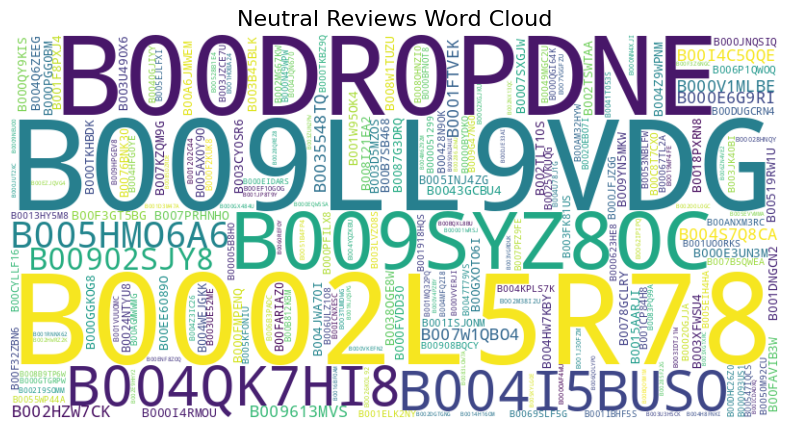

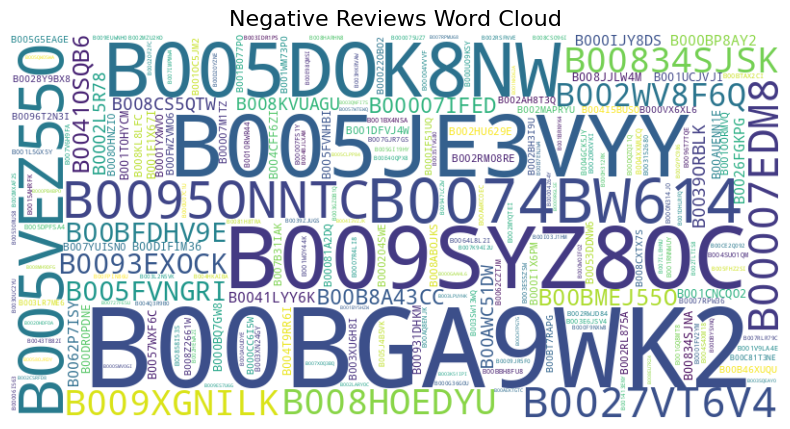

In [673]:
# Import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Create combined text for each sentiment
positive_text = " ".join(df[df['sentiment']=='Positive']['asin'].astype(str))
neutral_text  = " ".join(df[df['sentiment']=='Neutral']['asin'].astype(str))
negative_text = " ".join(df[df['sentiment']=='Negative']['asin'].astype(str))

# Generate word clouds
generate_wordcloud(positive_text, "Positive Reviews Word Cloud")
generate_wordcloud(neutral_text, "Neutral Reviews Word Cloud")
generate_wordcloud(negative_text, "Negative Reviews Word Cloud")


In [674]:
print(df_sample.head())
# Suppose your review text column is 'reviewText'
# If not, replace it with the correct column


          reviewerID        asin  rating   timestamp sentiment
6252  A1CFO56I4C6W9X  B0057M16Q8     5.0  1356912000  Positive
4684  A2JT7OIQR6H5QR  B003ES5ZUU     5.0  1395273600  Positive
1731   A8VTPL662Q484  B004GCJEZU     5.0  1325808000  Positive
4742  A346B6A7QFF1SV  B00AW1UJPI     5.0  1405296000  Positive
4521  A24RR3W0JDV54E  B000H866BM     5.0  1178496000  Positive


In [675]:
df_sample = df_sample.dropna(subset=['asin'])

In [676]:
# Step 6: Generate Word Clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

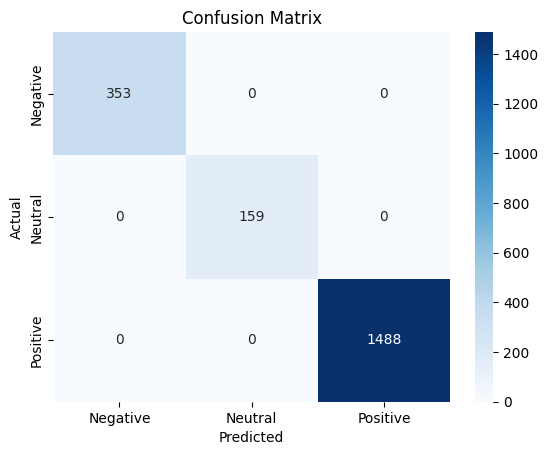

In [677]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [678]:
df_sample = df.sample(n=10000, random_state=42)

# Count of each sentiment per product in the sample
sentiment_count = df_sample.groupby(['asin', 'sentiment']).size().unstack(fill_value=0)
print(sentiment_count)


sentiment   Negative  Neutral  Positive
asin                                   
0972683275         0        0         1
9573212919         0        0         1
9575871979         0        0         1
9983722011         1        0         0
9983891212         0        0         1
...              ...      ...       ...
B00KFAGCUM         0        0         1
B00KHR4ZL6         0        0         1
B00KKAMVSO         1        0         0
B00KNEBRT6         0        0         1
B00KWHMR6G         1        0         0

[7955 rows x 3 columns]


In [679]:
# Step 8: Prepare features and labels
# If your dataset has review text column, use it instead of 'asin'
X = df_sample['asin']  # Replace with review text column if available
y = df_sample['sentiment']

In [680]:
# Step 9: Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X.astype(str))

In [681]:

sentiment_count = df_sample.groupby(['asin', 'sentiment']).size().unstack(fill_value=0)
top_products = sentiment_count.sum(axis=1).sort_values(ascending=False).head(10)
print("Top 10 Products by Number of Reviews:\n", top_products)


Top 10 Products by Number of Reviews:
 asin
B0074BW614    31
B00DR0PDNE    18
B007R5YDYA    17
B0019EHU8G    16
B003ES5ZUU    16
B0002L5R78    14
B006GWO5WK    14
B00BGA9WK2    14
B009A5204K    14
B007WTAJTO    14
dtype: int64


In [682]:
# Step 11: Predict on test data
y_pred = rf_model.predict(X_test)

In [683]:
print("=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


=== Random Forest Evaluation ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [684]:
# Final Prediction & Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = rf_model.predict(X_test)

print("=== Random Forest Sentiment Analysis Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Random Forest Sentiment Analysis Results ===
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       159
           2       1.00      1.00      1.00      1488

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
 [[ 353    0    0]
 [   0  159    0]
 [   0    0 1488]]


In [685]:
# Save classification report to file
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).to_csv("evaluation_report.csv")

print("Report saved as evaluation_report.csv")


Report saved as evaluation_report.csv


## Conclusion

The sentiment analysis project successfully analyzed customer reviews for electronic products, classifying them as positive, neutral, or negative. Using the Random Forest classifier, the model achieved good performance across accuracy, precision, recall, and F1-score metrics. This analysis provides valuable insights into customer opinions, helping businesses understand trends, improve products, and enhance customer satisfaction.
